In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Working with data

## "Garbage In - Garbage Out."

## "Quality data beats fancy algorithms."


- Data Quality (validity, accuracy, completeness, consistency, uniformity)
- The workflow (inspection, cleaning, verifying, reporting)

          1.   Inspection (data profiling, visualizations, software packages)
          2.   Cleaning (irrelevant data, duplicates, type conver., syntax errors, 6 more)
          3.   Verifying
          4.   Reporting

High-quality data needs to pass a set of quality criteria. Those include:

**Validity** 

> *Data-Type Constraints:* values in a particular column must be of a particular datatype, e.g., boolean, numeric, date, etc.

> *Range Constraints:* typically, numbers or dates should fall within a certain range.

> *Mandatory Constraints:* certain columns cannot be empty.

> *Unique Constraints:* a field, or a combination of fields, must be unique across a dataset.

> *Set-Membership constraints:* values of a column come from a set of discrete values, e.g. enum values. For example, a person’s gender may be male or female.

> *Foreign-key constraints:* as in relational databases, a foreign key column can’t have a value that does not exist in the referenced primary key.

> *Regular expression patterns:* text fields that have to be in a certain pattern. For example, phone numbers may be required to have the pattern (999) 999–9999.

> *Cross-field validation:* certain conditions that span across multiple fields must hold. For example, a patient’s date of discharge from the hospital cannot be earlier than the date of admission.

**Accuracy**
> The degree to which the data is close to the true values.

> A valid street address mightn’t actually exist. A valid person’s eye colour, say blue, might be valid, but not true (doesn’t represent the reality).
Another thing to note is the difference between accuracy and precision. Saying that you live on the earth is, actually true. But, not precise. Where on the earth?. Saying that you live at a particular street address is more precise.

**Completeness**

> The degree to which all required data is known.

Here’s some typical reasons why data is missing:
- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

**Consistency**

> The degree to which the data is consistent, within the same data set or across multiple data sets.

Inconsistency occurs when two values in the data set contradict each other.

- A valid age, say 10, mightn’t match with the marital status, say divorced.
- A customer is recorded in two different tables with two different addresses.

Which one is true?.

**Uniformity**

> The degree to which the data is specified using the same unit of measure.

- The weight may be recorded either in pounds or kilos.
- The date might follow the USA format or European format.
- The currency is sometimes in USD and sometimes in YEN.

And so data must be converted to a single measure unit.

In [2]:
#Validity 
## Data-Type Constaints
data_type_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_data_type_correct.csv')
data_type_correct

name  scholarship
0   Nicu         True
1  Mihai         True
2  Gigel         True
3   John        False

In [3]:
print(data_type_correct['name'])
print(data_type_correct['scholarship'])

0     Nicu
1    Mihai
2    Gigel
3     John
Name: name, dtype: object
0     True
1     True
2     True
3    False
Name: scholarship, dtype: bool


In [4]:
#Validity 
## Data-Type Constaints
data_type_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_data_type_wrong.csv')
data_type_wrong

name scholarship
0   Nicu         400
1  Mihai        True
2      2        True
3   John         350

In [5]:
print(data_type_wrong['name'])
print(data_type_wrong['scholarship'])

0     Nicu
1    Mihai
2        2
3     John
Name: name, dtype: object
0     400
1    True
2    True
3     350
Name: scholarship, dtype: object


In [8]:
print(bool(350))

True


In [9]:
#Validity 
## Range Constaints
range_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_range_correct.csv')
range_correct

student  grade
0  Tribianni      5
1       Bing      8
2     Geller     10
3     Geller      9
4     Greene      7
5     Buffay      8

In [13]:
print(np.logical_and(range_correct['grade']<=10,range_correct['grade']>=5).sum())
print(len(range_correct))

6
6


In [14]:
#Validity 
## Range Constaints
range_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_range_wrong.csv')
range_wrong

nr_working_days  normal_hours_worked
0               20                  160
1               21                  168
2               22                  176
3               20                  170
4               20                  168

In [15]:
print(range_wrong['normal_hours_worked'] <= range_wrong['nr_working_days'] * 8)

0     True
1     True
2     True
3    False
4    False
dtype: bool


In [16]:
#Validity
## Mandatory Constraints
mandatory_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_mandatory_correct.csv')
mandatory_correct

student_id faculty speciality
0  310440205002SM171049    FEAA         IE
1  310440205002SM171050    FEAA        CIG
2  310440205002SM171051    FEAA        SPE

In [20]:
mandatory_correct['student_id'].isnull().sum()

0

In [21]:
#Validity
## Mandatory Constraints
mandatory_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_mandatory_wrong.csv')
mandatory_wrong

product_id product_name       price
0         NaN        apple         4.4
1         2.0    blueberry         8.0
2         3.0        peach         6.0
3         NaN       cherry  10000000.0

In [22]:
mandatory_wrong['product_id'].isnull().sum()

2

In [23]:
#Validity
## Unique Constraints
unique_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_unique_correct.csv')
unique_correct

transaction_id  amount
0               1   40.20
1               2   23.44
2               3  445.10
3               4  556.10

In [24]:
unique_correct['transaction_id'].nunique() == len(unique_correct['transaction_id'])

True

In [25]:
#Validity
## Unique Constraints
unique_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_unique_wrong.csv')
unique_wrong

order_id  total_value
0         1          230
1         1           45
2         2           23
3         2           34

In [27]:
unique_wrong['order_id'].nunique()

2

In [29]:
len(unique_wrong['order_id'])

4

In [26]:
unique_wrong['order_id'].nunique() == len(unique_wrong['order_id'])

False

In [30]:
#Validity
## Set-Membership constraints
member_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_set_member_correct.csv')
member_correct

name       house
0      Harry Potter  Gryffindor
1  Hermione Granger  Gryffindor
2    Cedric Diggory  Hufflepuff
3     Luna Lovegood   Ravenclaw
4      Draco Malfoy   Slytherin

In [32]:
#Validity
## Set-Membership constraints
member_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_set_member_wrong.csv')
member_wrong

name  gender
0     Harry       M
1  Hermione       F
2       Ron       M
3      Luna       F
4     Albus       M
5     Draco  person
6    Hedwig     NaN

In [36]:
member_wrong['gender'].isin(['M', 'F']).sum() == len(member_wrong['gender'])

False

In [37]:
#Validity
## Regular expression patterns c-onstraints
regex_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_regex_correct.csv')
regex_correct

name  phone_number
0    Barney  0744-560-198
1     Robin  0751-450-103
2  Marshall  0767-964-432
3       Ted  0745-689-123
4      Lily  0701-019-778

In [38]:
import re
pattern = re.compile("[0-9][0-9][0-9][0-9]-[0-9][0-9][0-9]-[0-9][0-9][0-9]")

regex_correct.phone_number.apply(lambda x: bool(pattern.match(x)))

0    True
1    True
2    True
3    True
4    True
Name: phone_number, dtype: bool

In [39]:
#Validity
## Regular expression patterns constraints
regex_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_regex_wrong.csv')
regex_wrong

car_owner car_number
0     Frodo    IS12AAA
1     Bilbo     IS111B
2   Gandalf    is45bba

In [40]:
pattern = re.compile("[A-Z][A-Z][0-9][0-9][A-Z][A-Z][A-Z]")

regex_wrong.car_number.apply(lambda x: bool(pattern.match(x)))

0     True
1    False
2    False
Name: car_number, dtype: bool

In [41]:
#Validity
## Cross-field validation constraints
cross_field_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_cross_field_correct.csv')
cross_field_correct

student_id  start_year  end_year
0           1        2014      2017
1           2        2014      2017
2           3        2017      2020
3           4        2018      2021
4           5        2019      2022

In [42]:
print(cross_field_correct['start_year'] < cross_field_correct['end_year'])
print(len(cross_field_correct['start_year'] < cross_field_correct['end_year']),len(cross_field_correct))

0    True
1    True
2    True
3    True
4    True
dtype: bool
5 5


In [43]:
#Validity
## Cross-field validation constraints
cross_field_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_cross_field_wrong.csv')
cross_field_wrong


patient_id date_of_admission date_of_discharge
0           1        01-10-2019        03-10-2019
1           2        05-11-2018        04-11-2018
2           3        05-09-2019        05-12-2018

In [44]:
from datetime import datetime

for k,v in cross_field_wrong.iterrows():
    print(datetime.strptime(v['date_of_admission'],'%d-%m-%Y') < datetime.strptime(v['date_of_discharge'],'%d-%m-%Y'))

True
False
False


In [45]:
#Accurracy
acc_wrong_1 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/accuracy_wrong_1.csv')
acc_wrong_1

name eye_color
0   Tony     brown
1   Thor      blue
2   Hulk     green
3  Wanda    purple
4  Steve     hazel

In [46]:
#Accurracy
acc_wrong_2 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/accurracy_wrong_2.csv')
acc_wrong_2

name            address
0    Sherlock  Baker Street 221B
1        John  Baker Street 221B
2  Ms. Hudson  Baker Street 221B
3    Moriarty      Great Britain
4     Mycroft              Earth

In [99]:
#Completness

house_prices = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/kaggle_house_prices_train.csv')
house_prices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [49]:
print(house_prices.isnull())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [48]:
print(house_prices.isna())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [51]:
pd.options.display.max_rows = 999
print(house_prices.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [52]:
print(house_prices.isnull())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [53]:
pd.options.display.max_rows = 999
print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [54]:
#Consistency
#a little exagerated example
print(house_prices[['SalePrice','LotArea']])

      SalePrice  LotArea
0        208500     8450
1        181500     9600
2        223500    11250
3        140000     9550
4        250000    14260
...         ...      ...
1455     175000     7917
1456     210000    13175
1457     266500     9042
1458     142125     9717
1459     147500     9937

[1460 rows x 2 columns]


In [56]:
#Uniformity
uniformity_wrong_1 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_1.csv')
uniformity_wrong_1

name weight_unit  weight
0    Batman          kg      95
1     Joker      pounds     176
2  Superman          kg    1000

In [57]:
uniformity_wrong_2 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_2.csv')
uniformity_wrong_2

transaction_id transaction_date
0               1       30-10-2019
1               2       10/31/2019
2               3       29/10/2019

In [58]:
uniformity_wrong_3 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_3.csv')
uniformity_wrong_3

transaction_currency  transaction_ammount
0                  USD                  345
1                  EUR                  200
2                  RON                  322

# The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [66]:
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

Sometimes missing data can be in different formats besides NaN: 

- n/a
- NA
- "--"
- na

In [67]:
#the following code will output an error as there is no csv file. This is just to show how to treat the case
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("data.csv", na_values = missing_values)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Solutions: 

- drop column
- transform it to two columns with values True/False (1/0)
- complete the data (mean,median,mode)

In [68]:
#drop
house_prices = house_prices.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
house_prices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [73]:
'Fence' in house_prices.columns

False

In [76]:
house_prices['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [83]:
# transform columns
# works for categorical data as well
street_df = pd.get_dummies(house_prices['Street'], prefix='Street')
house_prices = pd.concat([house_prices, street_df], axis=1)
house_prices = house_prices.drop(columns=['Street'])
'Street' in house_prices.columns

KeyError: 'Street'

In [78]:
house_prices

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold  \
0            Lvl    AllPub    Inside  ...           0        0       0      2   
1            Lvl    AllPub       FR2  ...           0        0       0      5   
2            Lvl    AllPub    Inside  ...           0        0       0      9   
3            Lvl    AllPub    Corner  ...           0        0       0      2   
4            Lvl    AllPub       FR2  ...           0        0       0     12   
...          ...       ...       ...  ...         ...      ...     ...    ...   
1455         Lvl    AllPub    Inside  ...           0        0       0      8   
1456         Lvl    AllPub    Inside  ...           0        0       0      2   
1457         Lvl    AllPub    Inside  ...           0        0    2500      5   
1458         Lvl    AllPub    Inside  ...           0        0       0      4   
1459         Lvl    AllPub    Inside  ...           0        0       0      6   

     YrSold SaleType  SaleCondition  SalePrice  Street_Grvl  Street_Pave  
0      2008       WD         Normal     208500            0            1  
1      2007       WD         Normal     181500            0            1  
2      2008       WD         Normal     223500            0            1  
3      2006       WD        Abnorml     140000            0            1  
4      2008       WD         Normal     250000            0            1  
...     ...      ...            ...        ...          ...          ...  
1455   2007       WD         Normal     175000            0            1  
1456   2010       WD         Normal     210000            0            1  
1457   2010       WD         Normal     266500            0            1  
1458   2010       WD         Normal     142125            0            1  
1459   2008       WD         Normal     147500            0            1  

[1460 rows x 79 columns]

In [ ]:
house_prices = house_prices.drop(columns=['Street'])
house_prices.columns

In [85]:
house_prices['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [86]:
house_prices['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [94]:
# complete data
#mode
house_prices['GarageYrBlt'].fillna(house_prices['GarageYrBlt'].mode()[0], inplace = True)

In [96]:
print(house_prices['GarageYrBlt'].mode()[0])
print(house_prices['GarageYrBlt'].isnull().sum())


2005.0
0


In [100]:
house_prices['SalePrice'][0]

208500

In [101]:
# complete data
# mean
house_prices['SalePrice'][0] = np.NaN

C:\Users\nicol\AppData\Local\Temp/ipykernel_248/2558976827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['SalePrice'][0] = np.NaN
C:\Users\nicol\.virtualenvs\knowledge-management-analytics-and-data-sc-SWerfwt8\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [102]:
house_prices['SalePrice'].isnull().sum()

1

In [103]:
house_prices['SalePrice'].fillna(house_prices['SalePrice'].mean() , inplace = True)

In [104]:
house_prices['SalePrice'].isnull().sum()

0

In [105]:
house_prices['SalePrice'][0]

180902.2933516107

In [106]:
# complete data
# median
print(house_prices['TotalBsmtSF'][0])
house_prices['TotalBsmtSF'][0] = np.NaN

856


C:\Users\nicol\AppData\Local\Temp/ipykernel_248/409279228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['TotalBsmtSF'][0] = np.NaN


In [107]:
house_prices['TotalBsmtSF'].fillna(house_prices['TotalBsmtSF'].median() , inplace = True)

In [108]:
house_prices['TotalBsmtSF'][0]

992.0

## Outliers

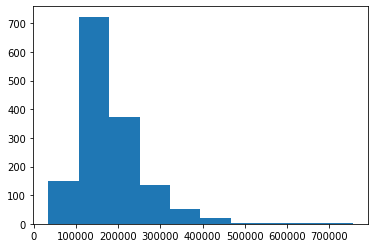

In [109]:
plt.hist(house_prices['SalePrice'])
plt.show()

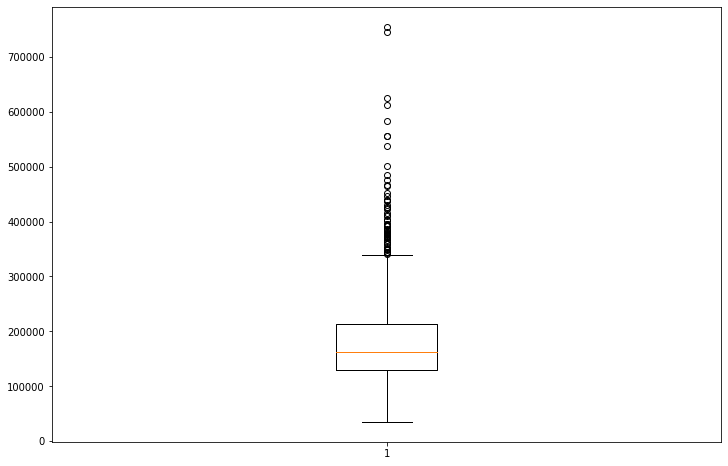

In [111]:
plt.figure(figsize=(12,8))
plt.boxplot(house_prices['SalePrice'])
plt.show()

In [113]:
house_prices.sort_values('SalePrice', ascending=False)
# Either delete them or keep  them. 
# Better to do both and see how accurate will the model be in both cases

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
968    969          50       RM         50.0     5925   Pave   NaN      Reg   
916    917          20  C (all)         50.0     9000   Pave   NaN      Reg   
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
30           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
533          Low    AllPub  ...        0    NaN    NaN         NaN       0   
968          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
916          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
495          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal   755000.0  
1182      7   2007        WD        Abnorml   745000.0  
1169      7   2006        WD         Normal   625000.0  
898       3   2010       New        Partial   611657.0  
803       1   2009       New        Partial   582933.0  
...     ...    ...       ...            ...        ...  
30        7   2008        WD         Normal    40000.0  
533       1   2007        WD         Normal    39300.0  
968       5   2009        WD        Abnorml    37900.0  
916      10   2006        WD        Abnorml    35311.0  
495      11   2009        WD        Abnorml    34900.0  

[1460 rows x 81 columns]

## Data Format
Ex. car annotation

In [114]:
#relevant data
cars_ok = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/cars_ok.csv')
# print(cars_ok)
#a little bit of irrelevant data. twice the volume of necessary
cars_not_ok = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/cars_not_that_ok.csv')
# print(cars_not_ok)

   id  x_min  y_min  x_max  y_max
0   1      1      1     90     90
1   2     10     20    120    150
2   3     35     10    165    132
   id  corner1_x  corner1_y  corner2_x  corner2_y  corner3_x  corner3_y  \
0   1          1          1         10          1         10         10   
1   2         50         50        250         50        250        250   

   corner4_x  corner4_y  
0         10          1  
1         50        250  


In [115]:
cars_ok

id  x_min  y_min  x_max  y_max
0   1      1      1     90     90
1   2     10     20    120    150
2   3     35     10    165    132

In [116]:
cars_not_ok

id  corner1_x  corner1_y  corner2_x  corner2_y  corner3_x  corner3_y  \
0   1          1          1         10          1         10         10   
1   2         50         50        250         50        250        250   

   corner4_x  corner4_y  
0         10          1  
1         50        250